In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15, 5)

# Analyze csv files after SILAC-Mass_spec experiments

First import files from the same folder

In [2]:
df = pd.read_csv('/data/silac_rym1.csv')

Take a look at how the data looks like:

In [3]:
df.head(3)

,probability,spectrum,spscore,peptide,protein,calc_neutral_pep_mass,protein_descr,pI,xcorr,ppm
0,0.9999,Li_Rym1IP_exp1_input15pct.00008.00008.2,757.0,K.ANNPQHSITK[136.11].D,YHR179W,1116.576724,"OYE2 SGDID:S0001222, Chr VIII from 462501-4637...",8.80,3.044,-0.5096
1,0.0633,Li_Rym1IP_exp1_input15pct.00010.00010.2,161.9,D.HNYSENDLEK[136.11].F,rev_YOL091W,1255.556044,"SPO21 SGDID:S0005451, Chr XV from 145333-14716...",4.65,1.713,0.4771
2,0.9999,Li_Rym1IP_exp1_input15pct.00012.00012.2,900.4,K.ANNPQHSITK.D,YHR179W,1108.562524,"OYE2 SGDID:S0001222, Chr VIII from 462501-4637...",8.80,2.907,-0.2251


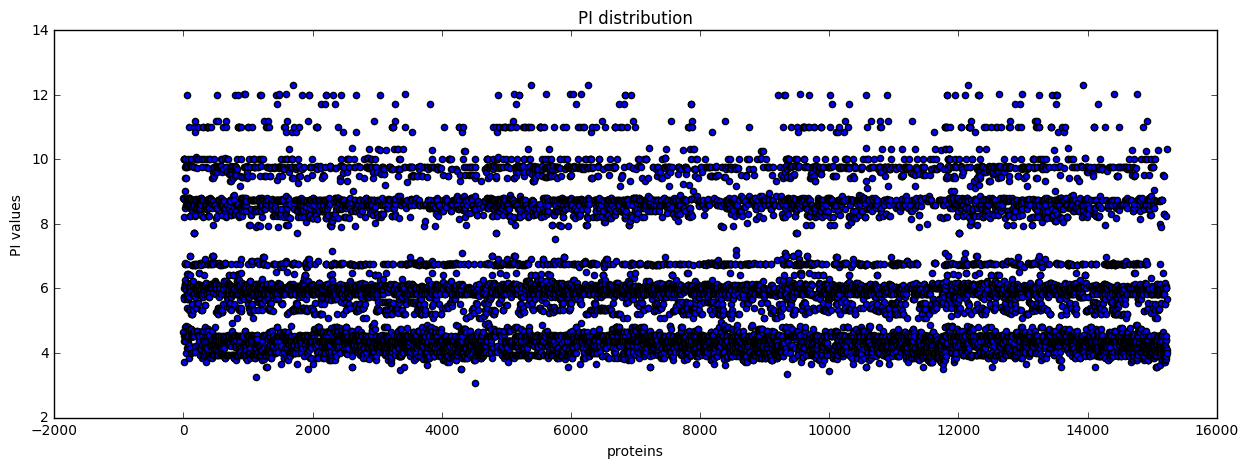

In [4]:
plt.scatter(df.index.values, df['pI'])
plt.xlabel('proteins')
plt.ylabel('PI values')
plt.title('PI distribution')
plt.show()

Take a look at the spread of pI values.

and probablities

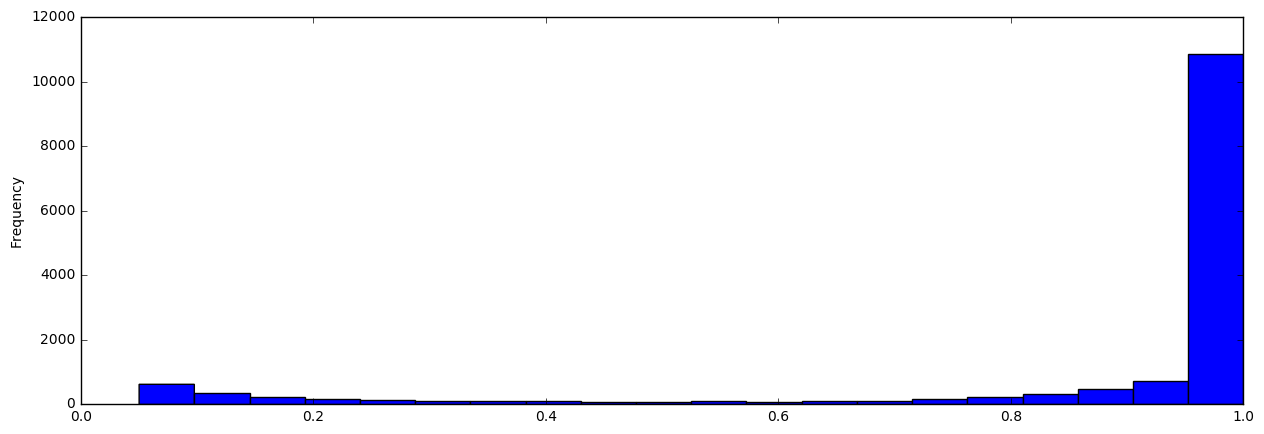

In [5]:
df['probability'].plot(kind='hist', bins = 20)

To get rid of the noise, drop data with probablity <=0.8

In [6]:
df80=df[df['probability']>0.8]

So, what proteins are there in the data?

In [7]:
counts_protein= df80['protein'].value_counts()
counts_protein[:10]

YBL015W            1158
YOR204W             258
YDR432W             246
YDL229W,YNL209W     224
YHR179W             192
YJL130C             189
K2C1_HUMAN          165
YBR118W,YPR080W     158
YLR303W             156
YPL231W             153
Name: protein, dtype: int64

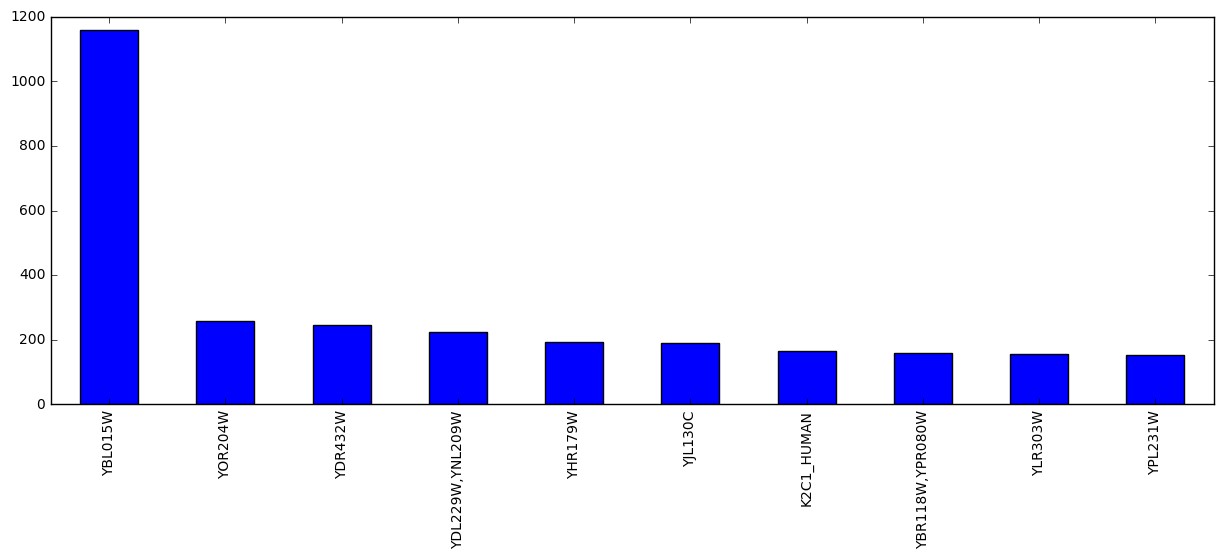

In [8]:
counts_protein[:10].plot(kind='bar')

How about peptides?

In [9]:
counts_peptide= df80['peptide'].value_counts()
counts_peptide[:10]

R.DQVPPNTPSDDMSR[166.11].A              55
R.DQVPPNTPSDDMSR.A                      50
R.DQVPPNTPSDDM[147.04]SR.A              42
K.AVPEALIDHVEK[136.11].N                39
K.AVPEALIDHVEK.N                        35
R.DQVPPNTPSDDM[147.04]SR[166.11].A      35
K.HLSM[147.04]FPQDLTYGFYTR.E            29
K.HLSMFPQDLTYGFYTR[166.11].E            25
R.ENSLETTFSSVNTR.D                      24
K.HLSM[147.04]FPQDLTYGFYTR[166.11].E    23
Name: peptide, dtype: int64

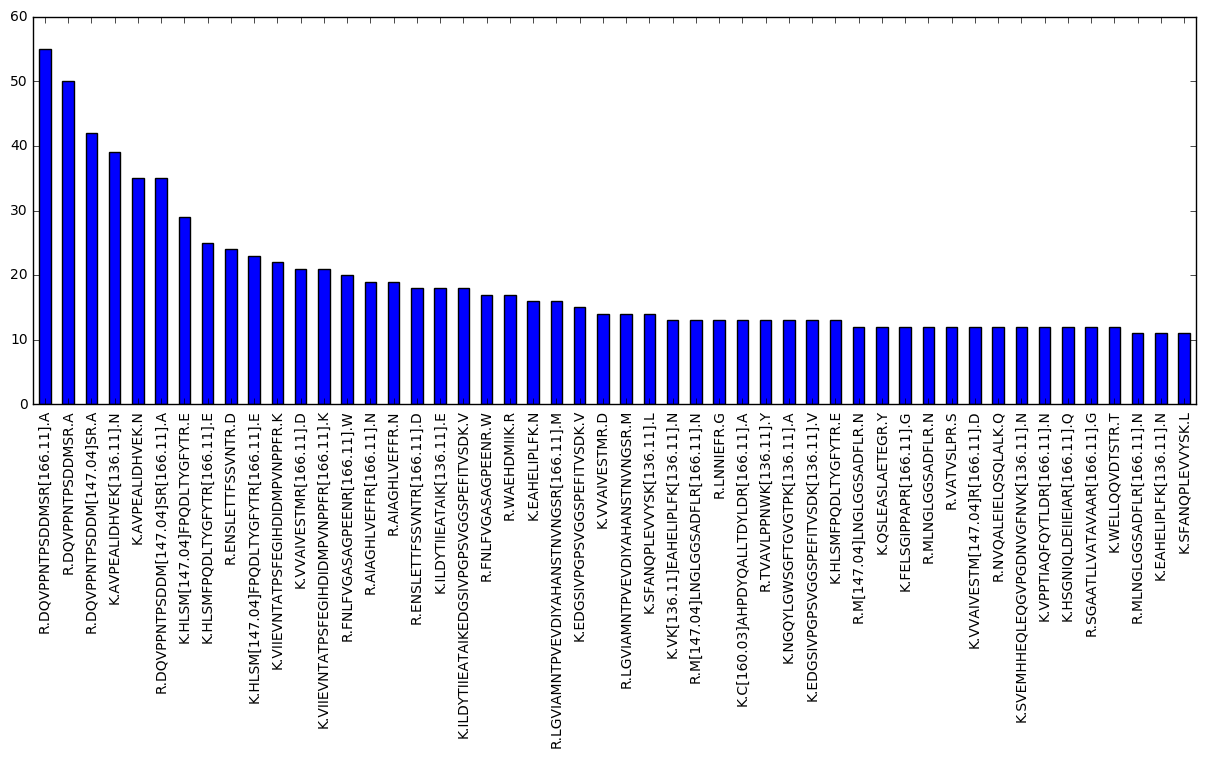

In [10]:
counts_peptide[:50].plot(kind='bar')

Extract peptides that are **HEAVY** from the dataset:

In [11]:
heavyK = df80['peptide'].str.contains('136')
heavyR = df80['peptide'].str.contains('166')
dfHeavy= df80[heavyK|heavyR]
countsHeavy= dfHeavy['protein'].value_counts()
countsHeavy = countsHeavy[countsHeavy>=15]
countsHeavy.head()

YBL015W            582
YOR204W            132
YJL130C            131
YDL229W,YNL209W    118
YDR432W            112
Name: protein, dtype: int64

Calculate the ratio of peptides by heavy  / total, sort it high to low and the plot to take a look:

In [12]:
ratio = 1/(counts_protein.astype(float)/countsHeavy)
ratio_pruned = ratio.dropna()
ratio_pruned.sort_values(inplace=True, ascending=False)
ratio_pruned.head(15)

YKR048C            1.000000
YNL064C            1.000000
YJL118W            1.000000
YER110C            1.000000
YIL070C            1.000000
YEL017W            1.000000
YHR020W            1.000000
YML085C,YML124C    1.000000
YML085C            0.956522
YMR108W            0.952381
YDL126C            0.882353
YBR127C            0.824561
YCL064C            0.823529
YFL037W            0.814815
YLL024C            0.814815
Name: protein, dtype: float64

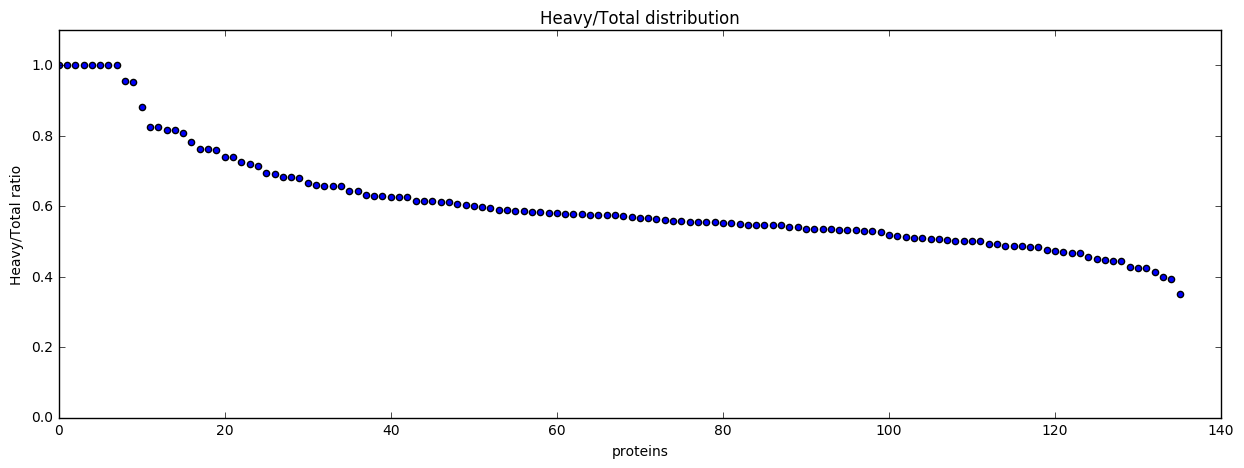

In [19]:
#ratio_pruned.plot(kind='bar' ) 
#changed to matplotlib advanced plot
plt.scatter(range(len(ratio_pruned)), ratio_pruned)
plt.xlim(0,140)
plt.ylim(0,1.1)
plt.xlabel('proteins')
plt.ylabel('Heavy/Total ratio')
plt.title('Heavy/Total distribution')
plt.show()


Get the 10 top from the list

In [20]:
ratio_pruned[:10]
#ratio_pruned[:10].index.values

YKR048C            1.000000
YNL064C            1.000000
YJL118W            1.000000
YER110C            1.000000
YIL070C            1.000000
YEL017W            1.000000
YHR020W            1.000000
YML085C,YML124C    1.000000
YML085C            0.956522
YMR108W            0.952381
Name: protein, dtype: float64

In [21]:
dfInfo = df[['protein', 'protein_descr']].drop_duplicates()
#dfInfo[dfInfo['protein']==ratio_pruned[:10].index[0]]
#df80[df80['protein']== 'YKR048C']
print type(dfInfo), type(ratio_pruned)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


Find and display the target proteins' information

In [22]:
result= pd.merge(pd.DataFrame(ratio_pruned[:10].index, columns=['protein']),dfInfo, how='inner')
result

,protein,protein_descr
0,YKR048C,"NAP1 SGDID:S0001756, Chr XI from 526282-525029..."
1,YNL064C,"YDJ1 SGDID:S0005008, Chr XIV from 507096-50586..."
2,YJL118W,"YJL118W SGDID:S0003654, Chr X from 191559-1922..."
3,YER110C,"KAP123 SGDID:S0000912, Chr V from 382099-37875..."
4,YIL070C,"MAM33 SGDID:S0001332, Chr IX from 231069-23026..."
5,YEL017W,"GTT3 SGDID:S0000743, Chr V from 123657-124670,..."
6,YHR020W,"YHR020W SGDID:S0001062, Chr VIII from 143988-1..."
7,"YML085C,YML124C","TUB1 SGDID:S0004550, Chr XIII from 99400-99376..."
8,YML085C,"TUB1 SGDID:S0004550, Chr XIII from 99400-99376..."
9,YMR108W,"ILV2 SGDID:S0004714, Chr XIII from 484083-4861..."
